In [1]:
from cleaning_data import read_multiple_days
df = read_multiple_days('Fri Jan 1, 2021', 200)
df.tail()

Added df for: Fri Jan 1, 2021
Added df for: Sat Jan 2, 2021
Added df for: Sun Jan 3, 2021
Added df for: Mon Jan 4, 2021
Added df for: Tue Jan 5, 2021
Added df for: Wed Jan 6, 2021
Added df for: Thu Jan 7, 2021
Added df for: Fri Jan 8, 2021
Added df for: Sat Jan 9, 2021
Added df for: Sun Jan 10, 2021
Added df for: Mon Jan 11, 2021
Added df for: Tue Jan 12, 2021
Added df for: Wed Jan 13, 2021
Added df for: Thu Jan 14, 2021
Added df for: Fri Jan 15, 2021
Added df for: Sat Jan 16, 2021
Added df for: Sun Jan 17, 2021
Added df for: Mon Jan 18, 2021
Added df for: Tue Jan 19, 2021
Added df for: Wed Jan 20, 2021
Added df for: Thu Jan 21, 2021
Added df for: Fri Jan 22, 2021
Added df for: Sat Jan 23, 2021
Added df for: Sun Jan 24, 2021
Added df for: Mon Jan 25, 2021
Added df for: Tue Jan 26, 2021
Added df for: Wed Jan 27, 2021
Added df for: Thu Jan 28, 2021
Added df for: Fri Jan 29, 2021
Added df for: Sat Jan 30, 2021
Added df for: Sun Jan 31, 2021
Added df for: Mon Feb 1, 2021
Added df for: Tue 

mmol/L  trend  exercise (mins)  day  month  year  hours_time  weekday  \
30584     9.8    3.0              NaN   17      4  2021   12.650000        5   
30585     9.8    3.0              NaN   17      4  2021   12.733333        5   
30586     9.7    3.0              NaN   17      4  2021   12.816667        5   
30587     9.8    3.0              NaN   17      4  2021   12.900000        5   
30588     9.7    3.0              NaN   17      4  2021   12.983333        5   

       Elliptical  Running  Walking  basketball  core training  \
30584           0        0        0           0              0   
30585           0        0        0           0              0   
30586           0        0        0           0              0   
30587           0        0        0           0              0   
30588           0        0        0           0              0   

       functional strength training  high intensity interval training  \
30584                             0                                 0   
30585                             0                                 0   
30586                             0                                 0   
30587                             0                                 0   
30588                             0                                 0   

       martial arts  other  soccer  yoga  
30584             0      0       0     0  
30585             0      0       0     0  
30586             0      0       0     0  
30587             0      0       0     0  
30588             0      0       0     0

In [2]:
df.to_pickle('full_2021_df.pkl')

In [1]:
import pandas as pd
df = pd.read_pickle('full_2021_df.pkl')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30589 entries, 0 to 30588
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mmol/L                            30589 non-null  float64
 1   trend                             30589 non-null  float64
 2   exercise (mins)                   674 non-null    float64
 3   day                               30589 non-null  int32  
 4   month                             30589 non-null  int32  
 5   year                              30589 non-null  int32  
 6   hours_time                        30589 non-null  float64
 7   weekday                           30589 non-null  int32  
 8   Elliptical                        30589 non-null  uint8  
 9   Running                           30589 non-null  uint8  
 10  Walking                           30589 non-null  uint8  
 11  basketball                        30589 non-null  uint8  
 12  core

## Investiage time series data for outliers
- To easily plot the data, change the data frame to be in time series format (where the indices are datetime fields)

In [3]:
import matplotlib.pyplot as plt
from cleaning_data import to_times_series
df = to_times_series(df)
df.head()


mmol/L  trend  exercise (mins)  day  month  year  \
datetime                                                                
2021-01-01 08:01:00     7.6    3.0              NaN    1      1  2021   
2021-01-01 08:06:00     7.6    3.0              NaN    1      1  2021   
2021-01-01 08:11:00     7.4    3.0              NaN    1      1  2021   
2021-01-01 08:16:00     7.4    3.0              NaN    1      1  2021   
2021-01-01 08:21:00     7.2    3.0              NaN    1      1  2021   

                     hours_time  weekday  Elliptical  Running  Walking  \
datetime                                                                 
2021-01-01 08:01:00    8.016667        4           0        0        0   
2021-01-01 08:06:00    8.100000        4           0        0        0   
2021-01-01 08:11:00    8.183333        4           0        0        0   
2021-01-01 08:16:00    8.266667        4           0        0        0   
2021-01-01 08:21:00    8.350000        4           0        0        0   

                     basketball  core training  functional strength training  \
datetime                                                                       
2021-01-01 08:01:00           0              0                             0   
2021-01-01 08:06:00           0              0                             0   
2021-01-01 08:11:00           0              0                             0   
2021-01-01 08:16:00           0              0                             0   
2021-01-01 08:21:00           0              0                             0   

                     high intensity interval training  martial arts  other  \
datetime                                                                     
2021-01-01 08:01:00                                 0             0      0   
2021-01-01 08:06:00                                 0             0      0   
2021-01-01 08:11:00                                 0             0      0   
2021-01-01 08:16:00                                 0             0      0   
2021-01-01 08:21:00                                 0             0      0   

                     soccer  yoga  
datetime                           
2021-01-01 08:01:00       0     0  
2021-01-01 08:06:00       0     0  
2021-01-01 08:11:00       0     0  
2021-01-01 08:16:00       0     0  
2021-01-01 08:21:00       0     0

<AxesSubplot:xlabel='datetime', ylabel='mmol/L'>

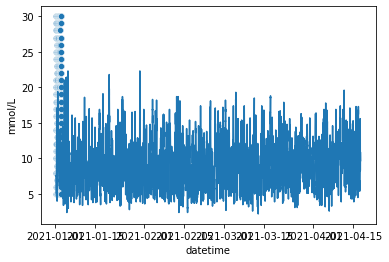

In [4]:
import seaborn as sns 
import random
ax = sns.lineplot(x=df.index, y=df['mmol/L'])
first_month = df.iloc[:500]
fm_id = first_month.index
sns.scatterplot(x=fm_id, y=[random.randint(5, 30) for i in range(500)], ax=ax)

In [44]:
import seaborn as sns 

def plot_time_series(df: pd.DataFrame, outliers: bool = False, title: str = 'Glucose Time Series Data'):
    fig, ax = plt.subplots(1, figsize=(25, 5))
    if outliers:
        # plot outliers if they exist
        df2 = df.loc[df[outliers] != 0]
        sns.scatterplot(x=df2.index, y=df2['mmol/L'], ax=ax, palette=['red'], color='darkred')

    # sns.set(rc={'figure.figsize': '25, 5'})
    sns.lineplot(x=df.index, y=df['mmol/L'], ax=ax)
    ax.set_title(title)
    return ax

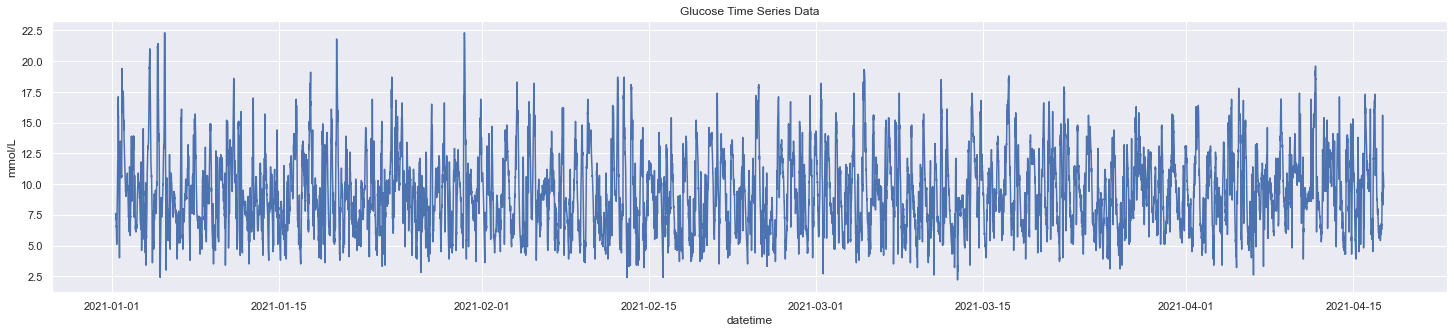

In [45]:
glucose_ax_1 = plot_time_series(df)

## Initial Time Series Graph
- By looking at the time series graph above, there seem to be some outliers in January for high blood sugars 
- Also, there are outliers across each month for low blood sugars 

In [7]:
glucose_ax_1.figure.savefig('graphs/time_series_01-04_2021.png')

## Examine distribution of glucose
- See how the glucoses are distributed in a histogram over the time period

Text(0.5, 1.0, 'Glucose Histogram')

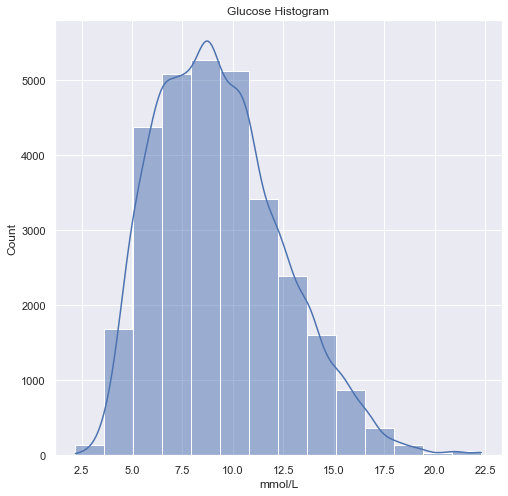

In [9]:
# graph a histplot with 14 bins (since glucose normally ranges from 3-16 from previous knowledge)
import numpy as np
glucose_hist_ax = sns.histplot(x=df['mmol/L'], bins=14, kde=True)
sns.set(rc={'figure.figsize': '8, 8'})
glucose_hist_ax.set_title('Glucose Histogram')

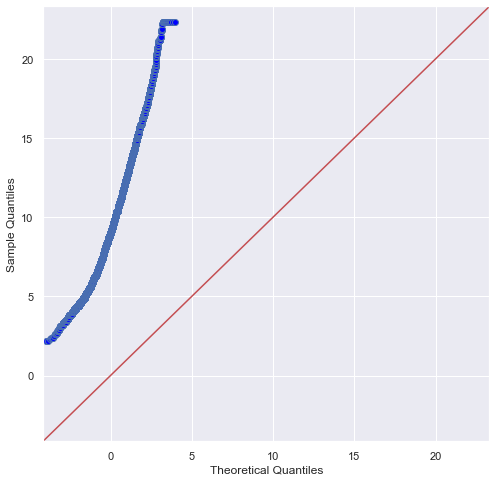

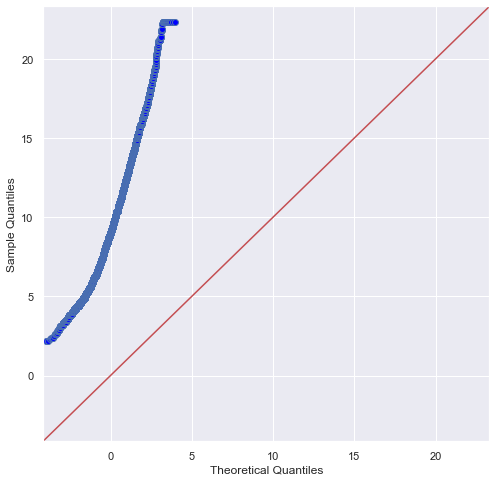

In [24]:
import statsmodels.api as sm
from scipy.stats import norm
import numpy as np

sm.qqplot(df['mmol/L'], line='45')

In [23]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df['mmol/L'])

(0.05141479893726214, 0.0009999999999998899)

## Check if data is normally distributed: Findings
- By using a QQ plot and lillie fors hypothesis test, the data is seen to not be normally distributed 
- Z-statistics should not be used to identify outliers for this reason

## Use IQR to look for outliers
- By examining the IQR, outliers can be identified in the data
- To see how many outliers I would be dealing with in the IQR method, plot a boxplot first

Text(0.5, 1.0, 'Glucose Boxplot')

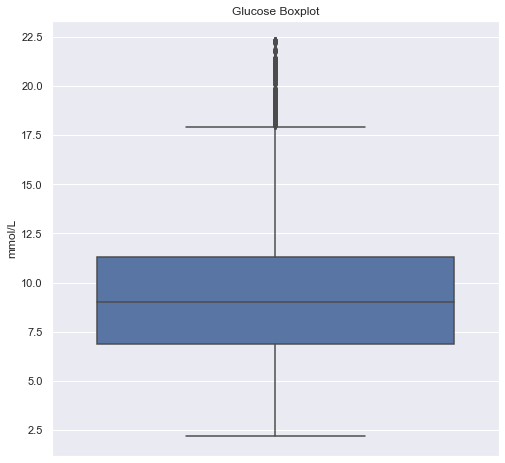

In [26]:
glucose_boxplot_ax = sns.boxplot(y=df['mmol/L'])
glucose_boxplot_ax.set_title('Glucose Boxplot')

## Glucose Boxplot: Findings
- There are no outliers identified for low blood sugars by this method (bad)
- Many high blood sugar (or glucose) readings are above the upper bound

In [27]:
# calculate the IQR and graph on the scatterplot
glucose_q1, glucose_q3 = df['mmol/L'].quantile([0.25, 0.75])
glu_iqr = glucose_q3-glucose_q1

# calculate lower and upper bounds for outliers
glucose_lower = glucose_q1 - (glu_iqr*1.5)
glucose_upper = glucose_q3 + (glu_iqr*1.5)

# fill in the dataframe as an iqr anomaly
df['iqr_anomaly'] = ((df['mmol/L'] > glucose_upper) | (df['mmol/L'] < glucose_lower)).astype(int)

df.head()

mmol/L  trend  exercise (mins)  day  month  year  \
datetime                                                                
2021-01-01 08:01:00     7.6    3.0              NaN    1      1  2021   
2021-01-01 08:06:00     7.6    3.0              NaN    1      1  2021   
2021-01-01 08:11:00     7.4    3.0              NaN    1      1  2021   
2021-01-01 08:16:00     7.4    3.0              NaN    1      1  2021   
2021-01-01 08:21:00     7.2    3.0              NaN    1      1  2021   

                     hours_time  weekday  Elliptical  Running  Walking  \
datetime                                                                 
2021-01-01 08:01:00    8.016667        4           0        0        0   
2021-01-01 08:06:00    8.100000        4           0        0        0   
2021-01-01 08:11:00    8.183333        4           0        0        0   
2021-01-01 08:16:00    8.266667        4           0        0        0   
2021-01-01 08:21:00    8.350000        4           0        0        0   

                     basketball  core training  functional strength training  \
datetime                                                                       
2021-01-01 08:01:00           0              0                             0   
2021-01-01 08:06:00           0              0                             0   
2021-01-01 08:11:00           0              0                             0   
2021-01-01 08:16:00           0              0                             0   
2021-01-01 08:21:00           0              0                             0   

                     high intensity interval training  martial arts  other  \
datetime                                                                     
2021-01-01 08:01:00                                 0             0      0   
2021-01-01 08:06:00                                 0             0      0   
2021-01-01 08:11:00                                 0             0      0   
2021-01-01 08:16:00                                 0             0      0   
2021-01-01 08:21:00                                 0             0      0   

                     soccer  yoga  iqr_anomaly  
datetime                                        
2021-01-01 08:01:00       0     0            0  
2021-01-01 08:06:00       0     0            0  
2021-01-01 08:11:00       0     0            0  
2021-01-01 08:16:00       0     0            0  
2021-01-01 08:21:00       0     0            0

<AxesSubplot:title={'center':'Glucose Time Series Data'}, xlabel='datetime', ylabel='mmol/L'>

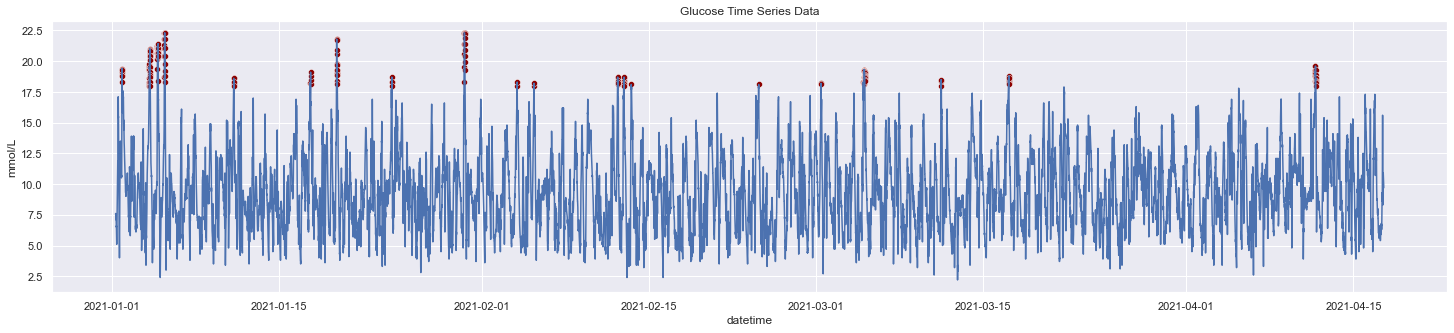

In [46]:
plot_time_series(df, outliers='iqr_anomaly')

## IQR: Findings
- Through IQR, outliers at high glucose levels were identified
- IQR cutoff seem to rigid and did not provide any outliers for low data
- I will look to use other methods that account for low data as well